### Gradient Descent

In [1]:
from sklearn.linear_model import SGDRegressor

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
height = np.random.normal(160, 20, 1000)
weight = 0.35*height+np.random.randn(1000)*3

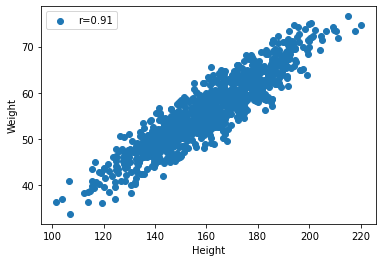

In [9]:
r = np.corrcoef(height, weight)[0, 1]
plt.scatter(height, weight, label=f"r={r:.2f}")
plt.legend()
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

In [22]:
def plot_fit(y_hat):
    plt.scatter(height, weight, label=f"actual")
    plt.plot(height, y_hat, color='red', lw=3, label="prediction")
    plt.legend()
    plt.xlabel("Height")
    plt.ylabel("Weight")
    plt.show()

In [20]:
def mse(y, y_hat):
    return ((y-y_hat)**2).sum()/len(y)

In [10]:
def predict(x):
    global m, c
    return m*x+c

Step1: Initlize parameters (m, c) randomly 

error: 765.1497370642963
coef: 0.17988893803152306
intercept: 0.06616997187706286


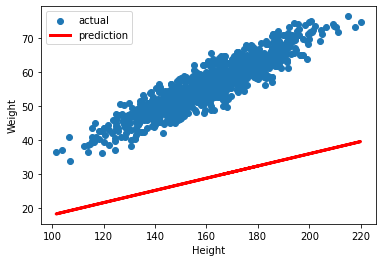

In [57]:
learning = [] # to store progress of learning
m=np.random.random()
c=np.random.random()
y_hat = predict(height)
error = mse(weight, y_hat)
print(f"error: {error}")
print(f"coef: {m}\nintercept: {c}")
plot_fit(y_hat)
learning.append([(m, c), error])

#### Step2

    calculate gradient of Cost Function (MSE) on initial parameters 

In [58]:
def gradient(x, y):
    global m,c
    g_m = ((m*x+c-y)*x).sum() / len(x)
    g_c = ((m*x+c-y)).sum() / len(x)
    return g_m, g_c

In [59]:
gm, gc = gradient(height, weight)

### step 3

    update weights / parameter by subracting the gradient with learning rate

In [60]:
eta = 0.00001

In [61]:
m = m - eta*gm
c = c - eta*gc

In [62]:
def check_progress():
    y_hat = predict(height)
    error = mse(weight, y_hat)
    print(f"error: {error}")
    print(f"coef: {m}\nintercept: {c}")
    plot_fit(y_hat)
    learning.append([(m, c), error])

error: 420.6660711848698
coef: 0.22441207171582217
intercept: 0.06644284841189786


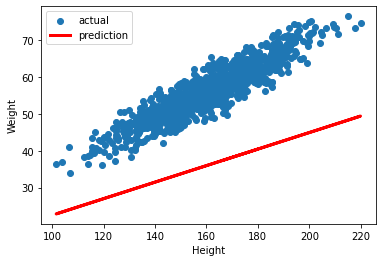

In [63]:
check_progress()

#### Step4: 

    Repeat Step 2 and 3 untill algorithm converge

error: 233.18526689293776
coef: 0.25725786919826016
intercept: 0.06664415499571602


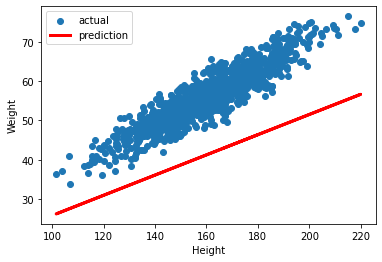

In [64]:
gm, gc = gradient(height, weight)
m = m - eta*gm
c = c - eta*gc
check_progress()

error: 131.15125059722004
coef: 0.2814890120460078
intercept: 0.0667926626877688


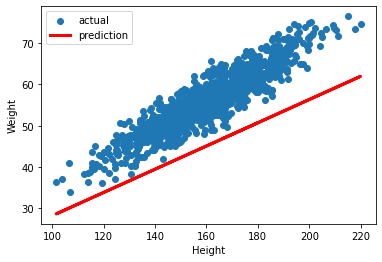

error: 75.62054962356882
coef: 0.29936491486365635
intercept: 0.06690221935453734


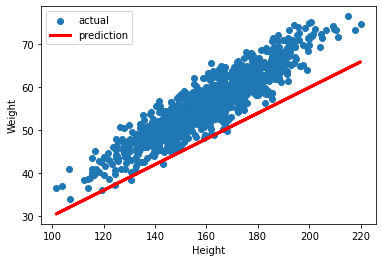

error: 45.398679872916354
coef: 0.31255240270091433
intercept: 0.06698304090357968


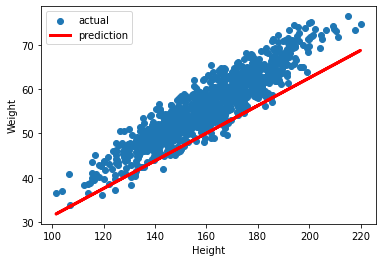

error: 28.95081598481554
coef: 0.322281132894992
intercept: 0.06704266385811232


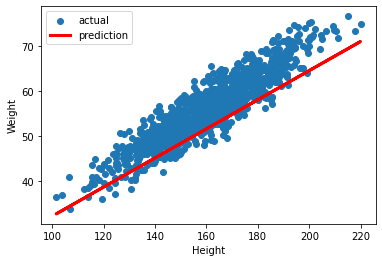

error: 19.999277621585296
coef: 0.32945825353993763
intercept: 0.06708664809442334


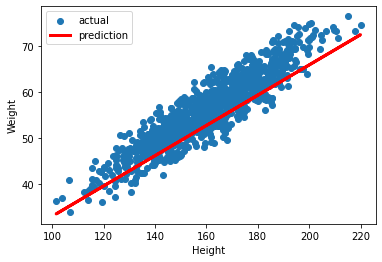

error: 15.127518005045419
coef: 0.3347529898252682
intercept: 0.06711909526833608


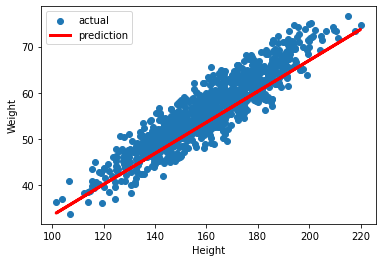

error: 12.476125495927038
coef: 0.3386590454331303
intercept: 0.06714303127100735


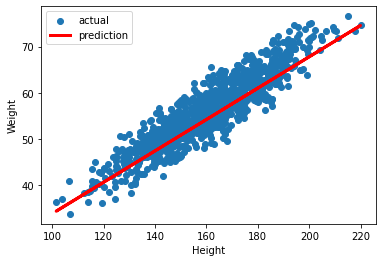

error: 11.033139225926009
coef: 0.34154063756512265
intercept: 0.06716068837586214


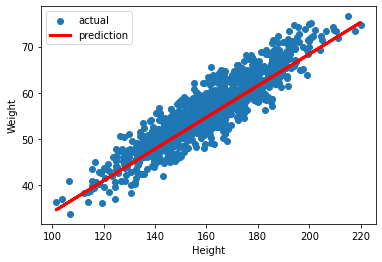

error: 10.24781250864353
coef: 0.3436664581000734
intercept: 0.06717371338524254


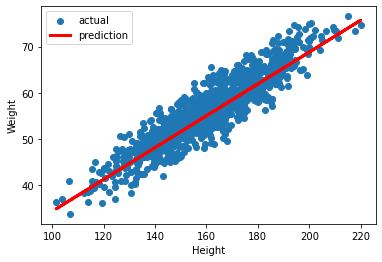

error: 9.820408543893246
coef: 0.3452347275652704
intercept: 0.06718332118524786


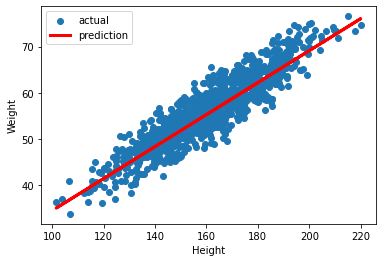

In [65]:
for i in range(10):
    gm, gc = gradient(height, weight)
    m = m - eta*gm
    c = c - eta*gc
    check_progress()

error: 9.587799433487682
coef: 0.34639167805976195
intercept: 0.06719040802687107


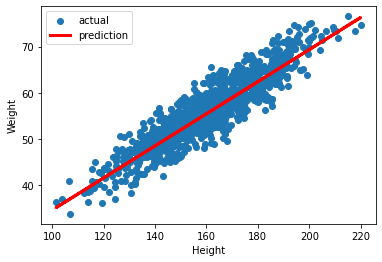

error: 9.461204917043332
coef: 0.34724518855594644
intercept: 0.06719563509624543


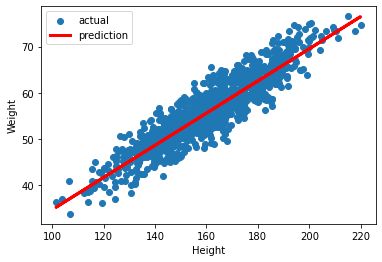

error: 9.392307479767565
coef: 0.3478748439928453
intercept: 0.06719949016644601


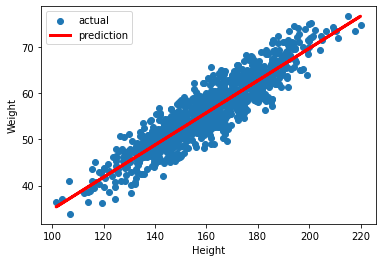

error: 9.354810935710368
coef: 0.3483393561136112
intercept: 0.06720233307952143


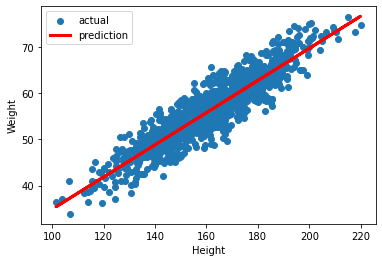

error: 9.334403923898698
coef: 0.3486820379976588
intercept: 0.0672044292996939


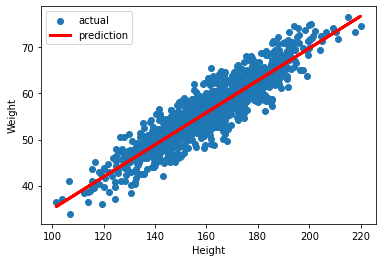

error: 9.32329767020043
coef: 0.34893484275602904
intercept: 0.06720597466636999


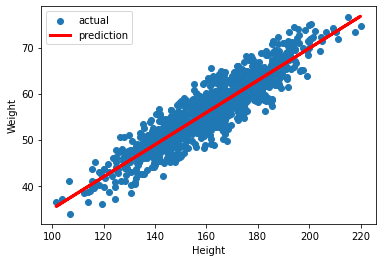

error: 9.317253234475954
coef: 0.3491213429750862
intercept: 0.06720711365503812


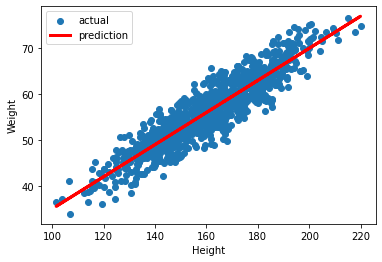

error: 9.313963628076937
coef: 0.34925892872452274
intercept: 0.06720795284877638


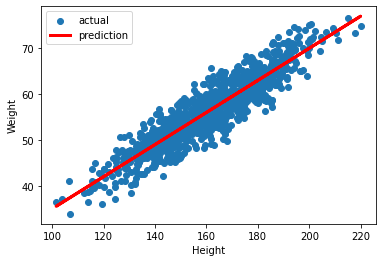

error: 9.312173302104773
coef: 0.3493604290812691
intercept: 0.06720857087651107


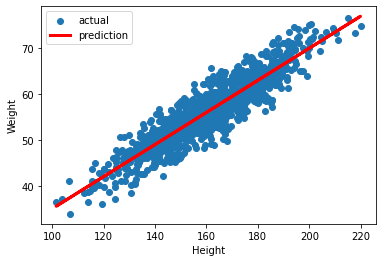

error: 9.311198940220681
coef: 0.34943530836707853
intercept: 0.06720902574471149


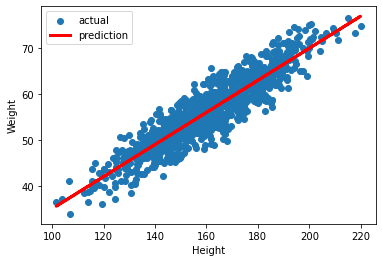

In [66]:
for i in range(10):
    gm, gc = gradient(height, weight)
    m = m - eta*gm
    c = c - eta*gc
    check_progress()

765.1497370642963
420.6660711848698
233.18526689293776
131.15125059722004
75.62054962356882
45.398679872916354
28.95081598481554
19.999277621585296
15.127518005045419
12.476125495927038
11.033139225926009
10.24781250864353
9.820408543893246
9.587799433487682
9.461204917043332
9.392307479767565
9.354810935710368
9.334403923898698
9.32329767020043
9.317253234475954
9.313963628076937
9.312173302104773
9.311198940220681


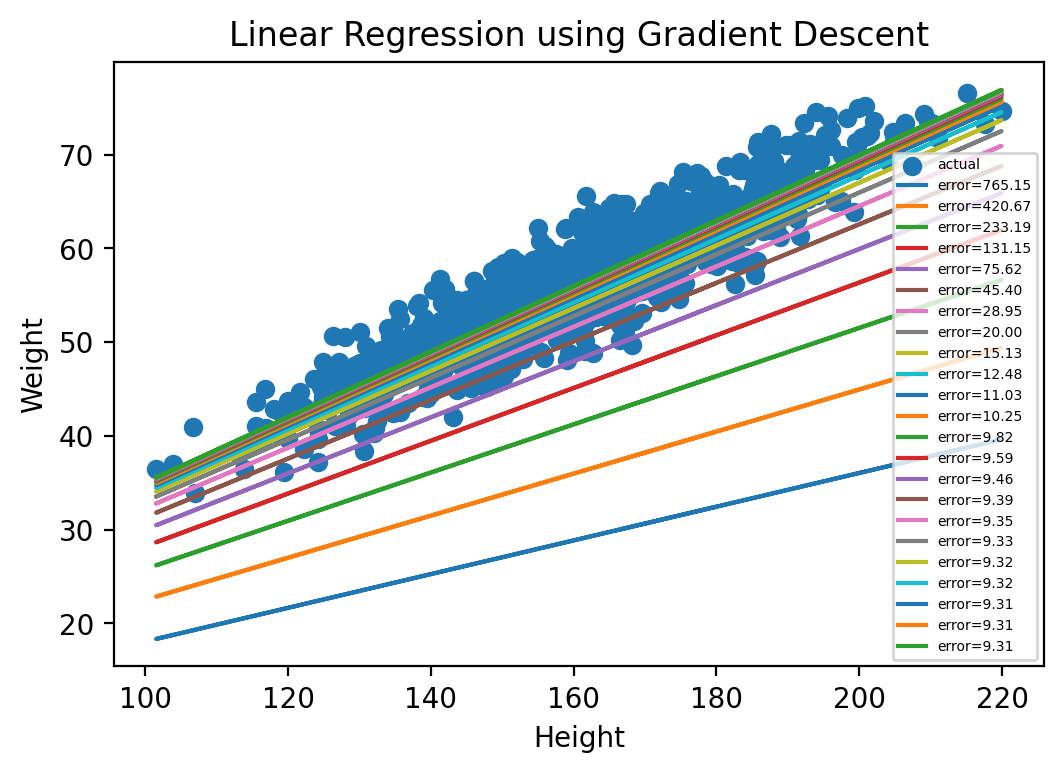

In [72]:
plt.figure(dpi=200)
plt.scatter(height, weight, label="actual")
for (m,c), error in learning:
    y_hat = m*height+c
    plt.plot(height, y_hat, label=f"error={error:0.2f}")
    print(error)
    
plt.title("Linear Regression using Gradient Descent")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.legend(fontsize=5)
plt.show()

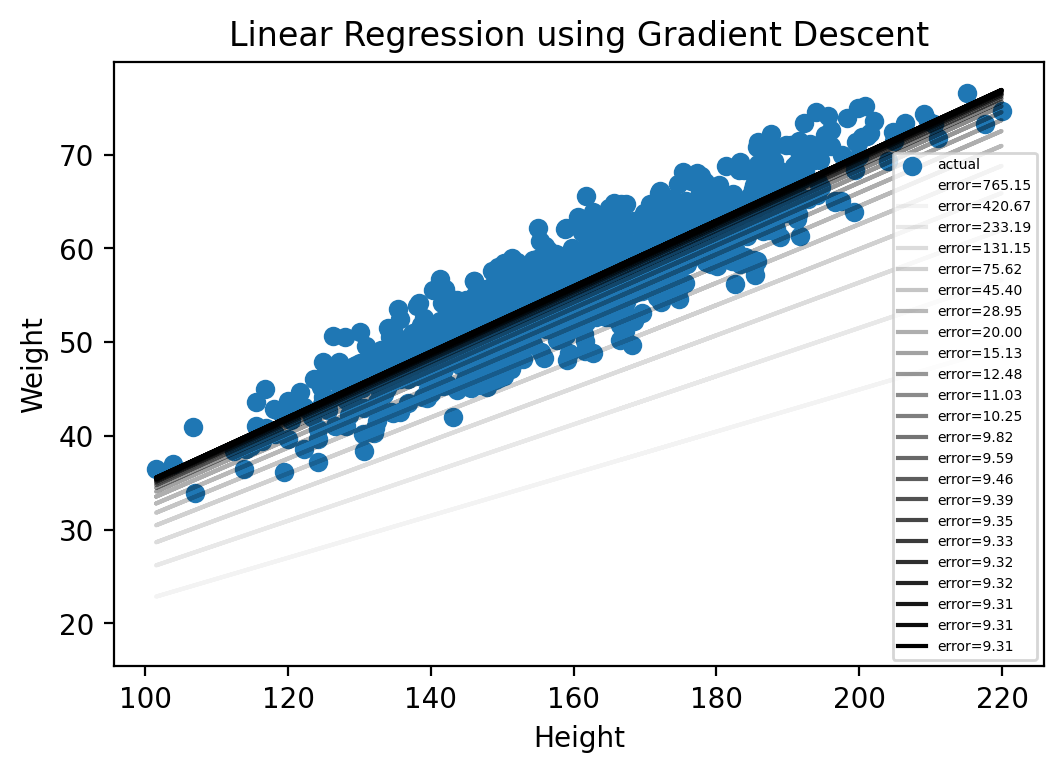

In [79]:
op = np.linspace(0, 1, len(learning))
plt.figure(dpi=200)
plt.scatter(height, weight, label="actual")
i = 0
for (m,c), error in learning:
    y_hat = m*height+c
    plt.plot(height, y_hat, label=f"error={error:0.2f}", color='k', alpha=op[i])
    i+=1
    
plt.title("Linear Regression using Gradient Descent")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.legend(fontsize=5)
plt.show()

# Early Stopping 

    tol = 0.001
    prev_error = ?
    curr_error = ?
    if abs(prev_error - curr_error) <= tol:
        break